# EXERCICI 1

L'analista ha d'assegurar-se que els registres consisteixen en una gamma completa de missatges i s'interpreten segons el context. Els elements de registre han de normalitzar-se, utilitzant els mateixos termes o terminologia, per evitar confusions i proporcionar cohesió.

Com Científic de Dades se t'ha proporcionat accés als registres-Logs on queda registrada l'activitat de totes les visites realitzades a la pàgina web de l'agència de viatges "akumenius.com".

- Exercici 1

Normalitza, identifica i enumera cada un dels atributs / variables de l'estructura de l'arxiu "Web_access_log-akumenius.com" que trobaràs al repositori de GitHub "Data-sources". 

In [1]:
filename = './data/Web_access_log-akumenius.txt'

In [2]:
import pandas as pd
import re
import seaborn as sns
pd.set_option('display.max_columns', None)
%matplotlib inline

In [3]:
log =pd.read_csv(filename, sep='- -',header=None,names=['web','text'],engine='python')

In [4]:
log.shape

(261873, 2)

In [5]:
log.head(10)

,web,text
0,localhost 127.0.0.1,"[23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/..."
1,localhost 127.0.0.1,"[23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/..."
2,localhost 127.0.0.1,"[23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/..."
3,localhost 127.0.0.1,"[23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/..."
4,localhost 127.0.0.1,"[23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/..."
5,localhost 127.0.0.1,"[23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/..."
6,localhost 127.0.0.1,"[23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/..."
7,localhost 127.0.0.1,"[23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/..."
8,localhost 127.0.0.1,"[23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/..."
9,localhost 127.0.0.1,"[23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/..."


In [6]:
log.isnull().sum()

web      0
text    27
dtype: int64

In [7]:
log.dropna(axis=0,inplace=True) # remove columns with null values

In [8]:
log.head()

,web,text
0,localhost 127.0.0.1,"[23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/..."
1,localhost 127.0.0.1,"[23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/..."
2,localhost 127.0.0.1,"[23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/..."
3,localhost 127.0.0.1,"[23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/..."
4,localhost 127.0.0.1,"[23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/..."


In [9]:
# remove those row containing local host 
log = log[~log.web.str.contains('localhost')]
log.reset_index(drop=True,inplace=True)

In [10]:
log[['host','ip']] = log.web.str.split(' ',expand=True).get([0,1])

In [11]:
log.drop(['web'],axis=1,inplace=True)

In [12]:
log.head()

,text,host,ip
0,"[23/Feb/2014:03:10:31 +0100] ""GET /hoteles-ba...",www.akumenius.com,66.249.76.216
1,"[23/Feb/2014:03:10:33 +0100] ""GET /hoteles-ba...",www.akumenius.com,66.249.76.216
2,"[23/Feb/2014:03:10:35 +0100] ""GET /hoteles-ba...",www.akumenius.com,66.249.76.216
3,"[23/Feb/2014:03:10:38 +0100] ""GET /hoteles-ba...",www.akumenius.com,66.249.76.216
4,"[23/Feb/2014:03:10:39 +0100] ""GET /destinos-b...",www.akumenius.com,66.249.76.216


In [13]:
log.text[1]
#contains date/time, an HTTP request (GET or POST) to a specific place, response from the system:
# response 200 --> received response, different kind of responses from 200 to 400
# response 401 --> authentication required
#web browser info

' [23/Feb/2014:03:10:33 +0100] "GET /hoteles-baratos/ofertas-hotel-Metropolis-Hotel-en-Kaunas-210244b-destinos.html HTTP/1.1" 404 3100 "-" "Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)" VLOG=-'

In [14]:
log['date']= log.text.str.extract('(\d+/\w+/\d+)')

In [15]:
log['time'] = log.text.str.extract(':(\d{2}:\d{2}:\d{2}.*)]')

In [16]:
log.head()

,text,host,ip,date,time
0,"[23/Feb/2014:03:10:31 +0100] ""GET /hoteles-ba...",www.akumenius.com,66.249.76.216,23/Feb/2014,03:10:31 +0100
1,"[23/Feb/2014:03:10:33 +0100] ""GET /hoteles-ba...",www.akumenius.com,66.249.76.216,23/Feb/2014,03:10:33 +0100
2,"[23/Feb/2014:03:10:35 +0100] ""GET /hoteles-ba...",www.akumenius.com,66.249.76.216,23/Feb/2014,03:10:35 +0100
3,"[23/Feb/2014:03:10:38 +0100] ""GET /hoteles-ba...",www.akumenius.com,66.249.76.216,23/Feb/2014,03:10:38 +0100
4,"[23/Feb/2014:03:10:39 +0100] ""GET /destinos-b...",www.akumenius.com,66.249.76.216,23/Feb/2014,03:10:39 +0100


In [17]:
log[['peticion','respuesta','user_data']] = log.text.str.split('"',expand=True).get([1,2,5])

In [18]:
log[['code','bytes']] = log.respuesta.str.split(' ',n=3,expand=True).get([1,2])

In [19]:
log.drop(['text','respuesta'],axis=1,inplace=True)

In [20]:
log.head()

,host,ip,date,time,peticion,user_data,code,bytes
0,www.akumenius.com,66.249.76.216,23/Feb/2014,03:10:31 +0100,GET /hoteles-baratos/ofertas-hotel-Club-&-Hote...,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,404,3100
1,www.akumenius.com,66.249.76.216,23/Feb/2014,03:10:33 +0100,GET /hoteles-baratos/ofertas-hotel-Metropolis-...,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,404,3100
2,www.akumenius.com,66.249.76.216,23/Feb/2014,03:10:35 +0100,GET /hoteles-baratos/ofertas-hotel-Faena-Hotel...,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,404,3100
3,www.akumenius.com,66.249.76.216,23/Feb/2014,03:10:38 +0100,GET /hoteles-baratos/ofertas-hotel-Kensington-...,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,404,3100
4,www.akumenius.com,66.249.76.216,23/Feb/2014,03:10:39 +0100,GET /destinos-baratos/destinosEstrelles/hotele...,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,200,8811


In [22]:
log.peticion[90] # resultado de como queda

'GET /destinos-baratos/destinosEstrelles/hoteles-en-Nova%20Milanese_ITALIA-con-1-estrella HTTP/1.1'

In [23]:
log[['request','info']] = log.peticion.str.split(' ',expand=True).get([0,1])

In [24]:
log.head()

,host,ip,date,time,peticion,user_data,code,bytes,request,info
0,www.akumenius.com,66.249.76.216,23/Feb/2014,03:10:31 +0100,GET /hoteles-baratos/ofertas-hotel-Club-&-Hote...,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,404,3100,GET,/hoteles-baratos/ofertas-hotel-Club-&-Hotel-Le...
1,www.akumenius.com,66.249.76.216,23/Feb/2014,03:10:33 +0100,GET /hoteles-baratos/ofertas-hotel-Metropolis-...,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,404,3100,GET,/hoteles-baratos/ofertas-hotel-Metropolis-Hote...
2,www.akumenius.com,66.249.76.216,23/Feb/2014,03:10:35 +0100,GET /hoteles-baratos/ofertas-hotel-Faena-Hotel...,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,404,3100,GET,/hoteles-baratos/ofertas-hotel-Faena-Hotel-Bue...
3,www.akumenius.com,66.249.76.216,23/Feb/2014,03:10:38 +0100,GET /hoteles-baratos/ofertas-hotel-Kensington-...,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,404,3100,GET,/hoteles-baratos/ofertas-hotel-Kensington-Town...
4,www.akumenius.com,66.249.76.216,23/Feb/2014,03:10:39 +0100,GET /destinos-baratos/destinosEstrelles/hotele...,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,200,8811,GET,/destinos-baratos/destinosEstrelles/hoteles-en...


In [25]:
log.shape

(247719, 10)

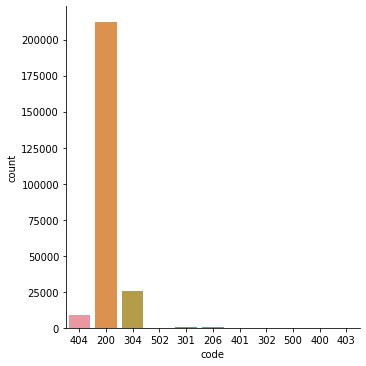

In [26]:
sns.catplot(x='code',kind='count',data=log)

In [27]:
log.ip.nunique()

2858

## Exercisi 3

In [28]:
import json
import os
from pandas import json_normalize
import numpy as np
from ip2geotools.databases.noncommercial import DbIpCity

In [29]:
all_ip= list(set(log.ip)) # unique ips

In [30]:
len(all_ip),type(all_ip)

(2858, list)

In [98]:
def extract_info_from_ip(ip):
    response = DbIpCity.get(ip, api_key='free').to_json()
    data= json.loads(response)  # return dictionary 
    return data
    
    
ip = '66.249.76.216'
#extract_info_from_ip(ip)

In [108]:
ip_extract_info = []
#day_3 = (day_1 + 1000, day_2 + 2000)
for i in range(800,1500):
    try:
        ip_extract_info.append(extract_info_from_ip(all_ip[i]))
    except Exception as err:
        continue
        

In [109]:
len(ip_extract_info)

0

In [101]:
#save data into a file multiple times because everyday i can only read 1000 records of ip info
with open('./data/ip_data.json', 'a') as file:
    json.dump(ip_extract_info, file)
    file.write(os.linesep)

In [122]:
# load data from file
with open('./data/ip_data.json') as file:
    ip_list = [json.loads(line) for line in file]

In [123]:
day1 = ip_list[0] # day 1 data
day2 = ip_list[1]
print(len(day1),len(day2))

500 134


In [124]:
day1[0],type(day1)
days = day1 + day2
print(len(days))


634


In [125]:
def extract_matching(x):
    for info in days:        
        if x == info['ip_address']:
            return info

In [126]:
log["contents"] = np.nan

In [127]:
log['contents'] = log['ip'].apply(extract_matching)

In [128]:
log.isnull().sum()

host              0
ip                0
date              0
time              0
peticion          0
user_data         0
code              2
bytes             2
request           0
info              0
contents     161778
dtype: int64

In [129]:
df_contents = json_normalize(log['contents'][:10])

In [130]:
df_contents

,ip_address,city,region,country,latitude,longitude
0,66.249.76.216,Mountain View,California,US,37.389389,-122.08321
1,66.249.76.216,Mountain View,California,US,37.389389,-122.08321
2,66.249.76.216,Mountain View,California,US,37.389389,-122.08321
3,66.249.76.216,Mountain View,California,US,37.389389,-122.08321
4,66.249.76.216,Mountain View,California,US,37.389389,-122.08321
5,66.249.76.216,Mountain View,California,US,37.389389,-122.08321
6,66.249.76.216,Mountain View,California,US,37.389389,-122.08321
7,66.249.76.216,Mountain View,California,US,37.389389,-122.08321
8,66.249.76.216,Mountain View,California,US,37.389389,-122.08321
9,66.249.76.216,Mountain View,California,US,37.389389,-122.08321


In [131]:
df= pd.concat([log,df_contents],axis=1)

In [132]:
df.drop(['ip','contents'],axis=1,inplace=True)
df.head()

,host,date,time,peticion,user_data,code,bytes,request,info,ip_address,city,region,country,latitude,longitude
0,www.akumenius.com,23/Feb/2014,03:10:31 +0100,GET /hoteles-baratos/ofertas-hotel-Club-&-Hote...,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,404,3100,GET,/hoteles-baratos/ofertas-hotel-Club-&-Hotel-Le...,66.249.76.216,Mountain View,California,US,37.389389,-122.08321
1,www.akumenius.com,23/Feb/2014,03:10:33 +0100,GET /hoteles-baratos/ofertas-hotel-Metropolis-...,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,404,3100,GET,/hoteles-baratos/ofertas-hotel-Metropolis-Hote...,66.249.76.216,Mountain View,California,US,37.389389,-122.08321
2,www.akumenius.com,23/Feb/2014,03:10:35 +0100,GET /hoteles-baratos/ofertas-hotel-Faena-Hotel...,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,404,3100,GET,/hoteles-baratos/ofertas-hotel-Faena-Hotel-Bue...,66.249.76.216,Mountain View,California,US,37.389389,-122.08321
3,www.akumenius.com,23/Feb/2014,03:10:38 +0100,GET /hoteles-baratos/ofertas-hotel-Kensington-...,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,404,3100,GET,/hoteles-baratos/ofertas-hotel-Kensington-Town...,66.249.76.216,Mountain View,California,US,37.389389,-122.08321
4,www.akumenius.com,23/Feb/2014,03:10:39 +0100,GET /destinos-baratos/destinosEstrelles/hotele...,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,200,8811,GET,/destinos-baratos/destinosEstrelles/hoteles-en...,66.249.76.216,Mountain View,California,US,37.389389,-122.08321


In [ ]:
log.head()